# Customer Behavior

## Upload Data dan Data Wrangling

In [48]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('/content/drive/MyDrive/mikti/Customer_Behaviour.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [52]:
# Mengecek kolom yang NUll
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [53]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [54]:
# Menampilkan nilai unik di setiap kolom
for col in df:
  print(f"{col}: {df[col].nunique()}")

User ID: 400
Gender: 2
Age: 43
EstimatedSalary: 117
Purchased: 2


In [55]:
df.describe(include='object')

,Gender
count,400
unique,2
top,Female
freq,204


## Data Cleansing dan Preprocessing

In [56]:
# Menghapus kolom yang tidak perlu yaitu User ID
df.drop('User ID', axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [57]:
# mengubah nilai kategori ke bentuk numerik
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [58]:
# Menampilkan style yang ada di library matplotlib untuk visualisasi
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Visualisasi korelasi dengan melihat density memakai KDE

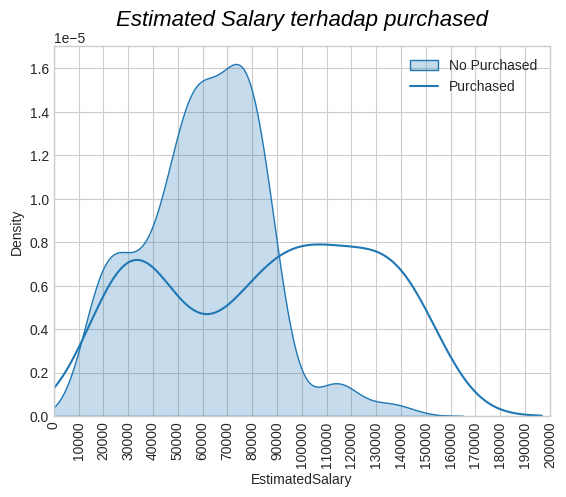

In [59]:
# plot kde estimatedSalary vs purchased

font = {'fontsize': 16, 'fontstyle':'italic', 'backgroundcolor': 'white', 'color': 'black'}

plt.style.use('seaborn-v0_8-whitegrid')
sns.kdeplot(df.loc[df['Purchased'] == 0, 'EstimatedSalary'], label ='No Purchased', shade =True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'EstimatedSalary'], label ='Purchased', shade =False)
plt.legend()
plt.title('Estimated Salary terhadap purchased', fontdict = font, pad=15)
plt.xticks(np.arange(0,200001,10000), rotation= 90)
plt.xlim([0,200001])
plt.show()

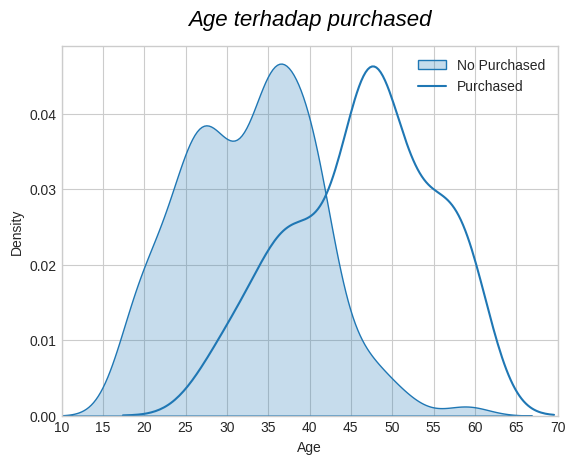

In [60]:
# plot kde Age vs purchased

font = {'fontsize': 16, 'fontstyle':'italic', 'backgroundcolor': 'white', 'color': 'black'}

plt.style.use('seaborn-v0_8-whitegrid')
sns.kdeplot(df.loc[df['Purchased'] == 0, 'Age'], label ='No Purchased', shade =True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'Age'], label ='Purchased', shade =False)
plt.legend()
plt.title('Age terhadap purchased', fontdict = font, pad=15)
plt.xticks(np.arange(0,71,5))
plt.xlim([10,70])
plt.show()

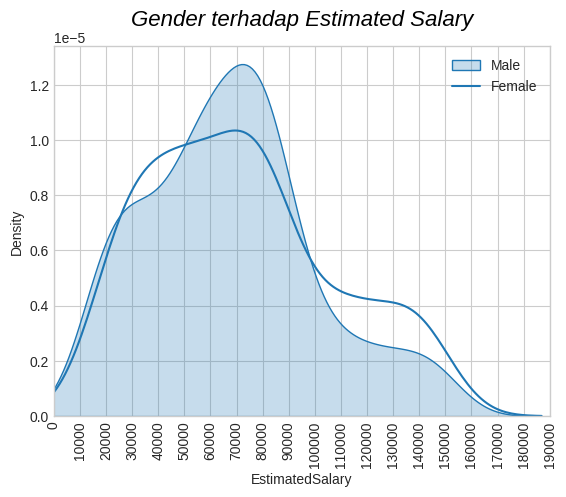

In [61]:
# plot kde Gender vs Estimated Salary

font = {'fontsize': 16, 'fontstyle':'italic', 'backgroundcolor': 'white', 'color': 'black'}

plt.style.use('seaborn-v0_8-whitegrid')
sns.kdeplot(df.loc[df['Gender'] == 0, 'EstimatedSalary'], label ='Male', shade =True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'EstimatedSalary'], label ='Female', shade =False)
plt.legend()
plt.title('Gender terhadap Estimated Salary', fontdict = font, pad=15)
plt.xticks(np.arange(0,190001,10000), rotation= 90)
plt.xlim([0,190001])
plt.show()

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.5100,0.500526,0.0,0.00,1.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


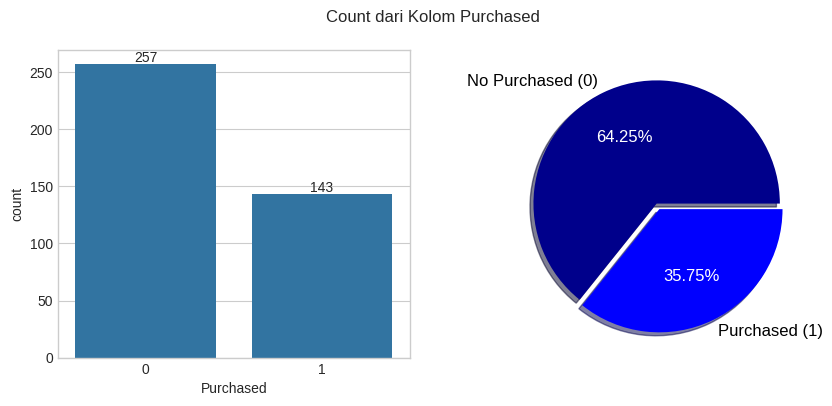

In [63]:
# Countplot untuk Purchased
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.countplot(x='Purchased', data=df, ax=axes[0])

# menampilkan label batangnya
for container in axes[0].containers:
  axes[0].bar_label(container)

# Pie chart untuk Purchased
slices = df.Purchased.value_counts().values
acticities = ['No Purchased (0)', 'Purchased (1)']
_,labeltext,percentage= axes[1].pie(slices, labels=acticities, autopct='%.2f%%', colors = ['darkblue', 'blue'], shadow =True, explode=[0,0.05], textprops={'color':'black','fontsize':12})

percentage[0].set_color('white')
percentage[1].set_color('white')
plt.suptitle('Count dari Kolom Purchased')
plt.show()

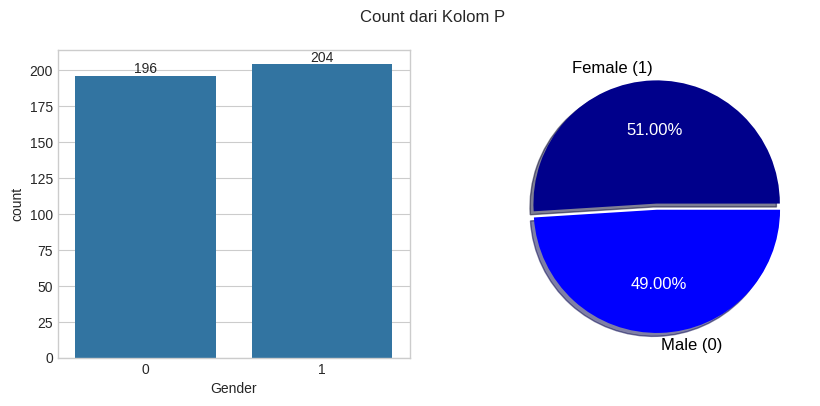

In [64]:
# Countplot untuk Gender
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.countplot(x='Gender', data=df, ax=axes[0])

# menampilkan label batangnya
for container in axes[0].containers:
  axes[0].bar_label(container)

# Pie chart untuk Gender
slices = df.Gender.value_counts().values
acticities = ['Female (1)', 'Male (0)']
_,labeltext,percentage= axes[1].pie(slices, labels=acticities, autopct='%.2f%%', colors = ['darkblue', 'blue'], shadow =True, explode=[0,0.05], textprops={'color':'black','fontsize':12})

percentage[0].set_color('white')
percentage[1].set_color('white')
plt.suptitle('Count dari Kolom P')
plt.show()

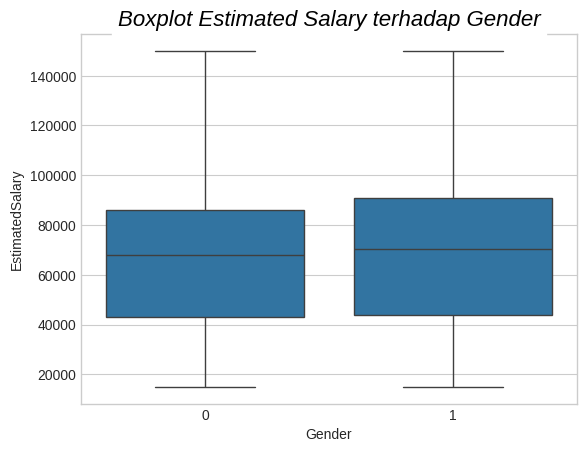

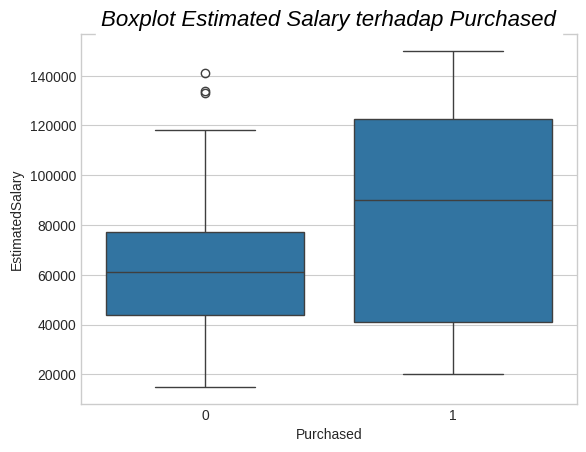

In [65]:
# boxplot untuk Estimated Salary terhadap male dan female
# boxplot untuk Estimated Salary terhadap purchased dan non purchased

for col in ['Gender','Purchased']:
  sns.boxplot(data=df, x=col, y='EstimatedSalary')
  plt.title(f'Boxplot Estimated Salary terhadap {col}', fontdict=font)
  plt.show()

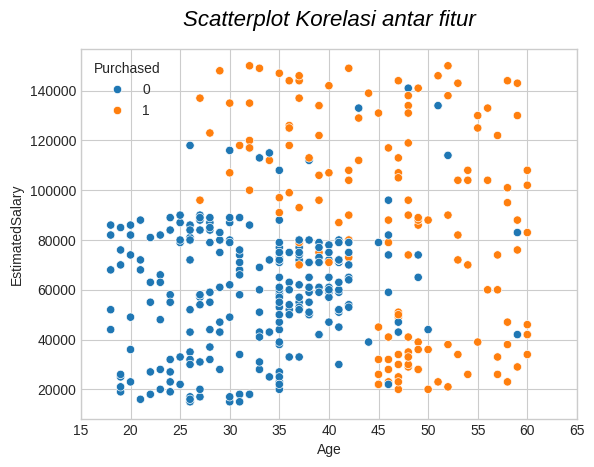

In [66]:
# Mengecek korelasi Age dengan Estimated Salary serta purchased
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased')
plt.title('Scatterplot Korelasi antar fitur', fontdict=font, y=1.04)
plt.xticks(np.arange(15,66,5))
plt.show()

## Modelling

### Melakukan Scalling data

In [67]:
# scaling dengan metode Min Max Scala
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df2 = df.copy()

scaler = MinMaxScaler(feature_range=(18,60)).fit(df2[['EstimatedSalary']])
df2['EstimatedSalary'] = scaler.transform(df2[['EstimatedSalary']].values.reshape(-1,1))
df2

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19.244444,0
1,0,35,19.555556,0
2,1,26,26.711111,0
3,1,27,31.066667,0
4,0,19,36.977778,0
...,...,...,...,...
395,1,46,26.088889,1
396,0,51,20.488889,1
397,1,50,19.555556,1
398,0,36,23.600000,0


In [68]:
# Membagi data menjadi x dengan y
x = np.asanyarray(df2.drop('Purchased', axis=1))
y = df2.Purchased.values.reshape(-1,1)

In [69]:
x

array([[ 0.        , 19.        , 19.24444444],
       [ 0.        , 35.        , 19.55555556],
       [ 1.        , 26.        , 26.71111111],
       ...,
       [ 1.        , 50.        , 19.55555556],
       [ 0.        , 36.        , 23.6       ],
       [ 1.        , 49.        , 24.53333333]])

In [70]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Proses mencari Model Terbaik

In [71]:
# Proses Modelling

FPR1 = []
TPR1 = []
FPR0 = []
TPR0 = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes in our target
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR0(list): list of False Positive Rate for class 0
        TPR0(list): list of True Positive Rate for class 0
        FPR1(list): list of Flase Positive Rate for class 1
        TPR1(list): list of True Positive Rate for class 1
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models
    """
    fig, ax = plt.subplots(1,2,figsize=(10,4))

    # plot model evaluation
    ax[0].set_title('Model Evaluation Results', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'accuracy': ACC_test, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}),
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot model accuracy
    ax[1].set_title('Model Accuracy Results for train and test', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'test accuracy': ACC_test, 'train accuracy': ACC_train}),
                                    markers=True, ax=ax[1])
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
    plt.show()

    # plot ROC curve for class 1
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    i=1
    ax[0].set_title('ROC Curve of Class 1', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR1, TPR1):
        ax[0].plot(fpr, tpr, label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[0].set_xlabel('FPR')
        ax[0].set_ylabel('TPR')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot ROC curve for class zero
    i=1
    ax[1].set_title('ROC Curve of Class 0', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR0, TPR0):
        ax[1].plot(fpr, tpr, '--', label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[1].set_xlabel('FPR')
        ax[1].set_ylabel('TPR')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True)

    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: logistic model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, is_add=1):
    # Split data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=1)
    print(20*'-', 'Shape', 20*'-')
    print(f'x_train: {x_train.shape}')
    print(f'y_train: {y_train.shape}')
    print(f'x_test: {x_test.shape}')
    print(f'y_test: {y_test.shape}')

    # Define the model
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())

    # Prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_test = clf.predict_proba(x_test)
    y_proba_train = clf.predict_proba(x_train)


    cm = metrics.confusion_matrix(y_test, y_pred_test)
    fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_test[:,1])
    fpr0, tpr0, _ = metrics.roc_curve(y_test, y_proba_test[:,0])
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test)
    pre = metrics.precision_score(y_test, y_pred_test)
    f1 = metrics.f1_score(y_test, y_pred_test)

    # append results
    if is_add == 1:
        FPR0.append(fpr0)
        TPR0.append(tpr0)
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes), '\n')

    # print other result about predicted data
    return clf, acc_test, acc_train


-------------------- Shape --------------------
x_train: (320, 3)
y_train: (320, 1)
x_test: (80, 3)
y_test: (80, 1)


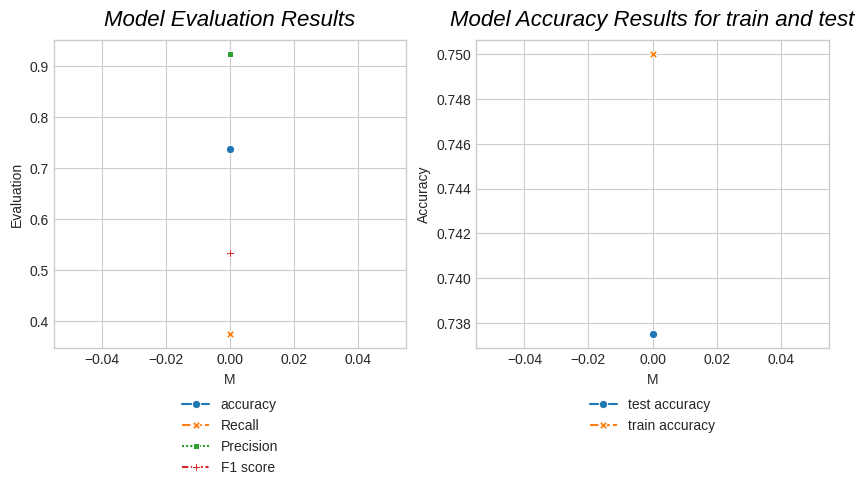

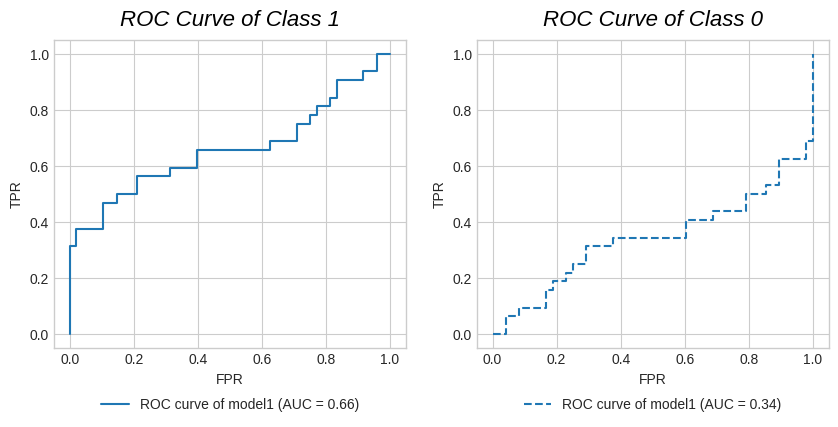

-------------------- Confusion Matrix --------------------
[[47  1]
 [20 12]]


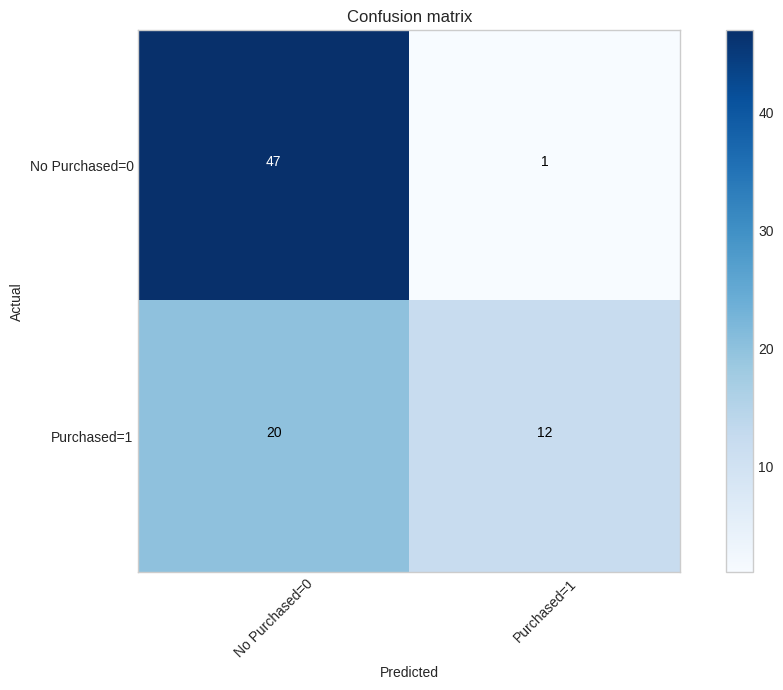

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.70      0.98      0.82        48
   Purchased=1       0.92      0.38      0.53        32

      accuracy                           0.74        80
     macro avg       0.81      0.68      0.68        80
  weighted avg       0.79      0.74      0.70        80
 



In [72]:
# Model Pertama
clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No Purchased=0', 'Purchased=1'])

-------------------- Shape --------------------
x_train: (280, 3)
y_train: (280, 1)
x_test: (120, 3)
y_test: (120, 1)


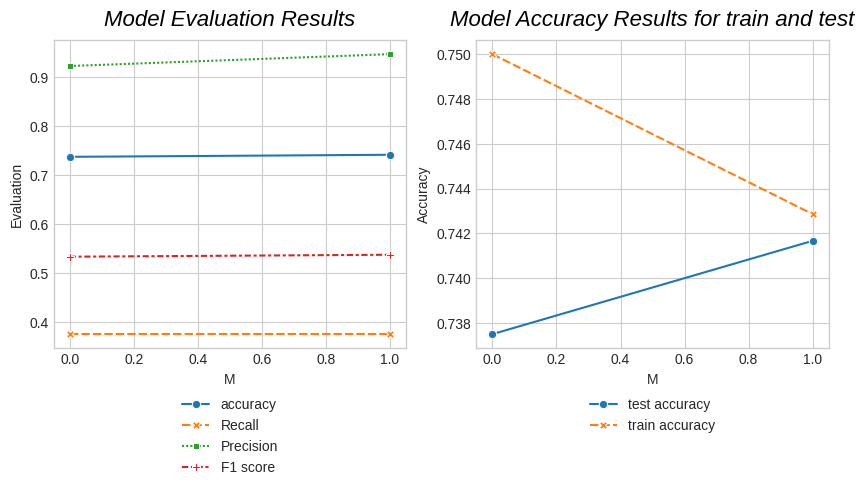

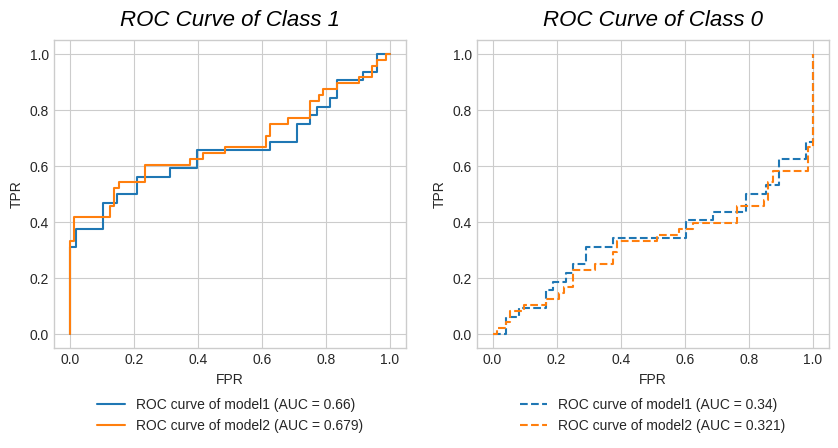

-------------------- Confusion Matrix --------------------
[[71  1]
 [30 18]]


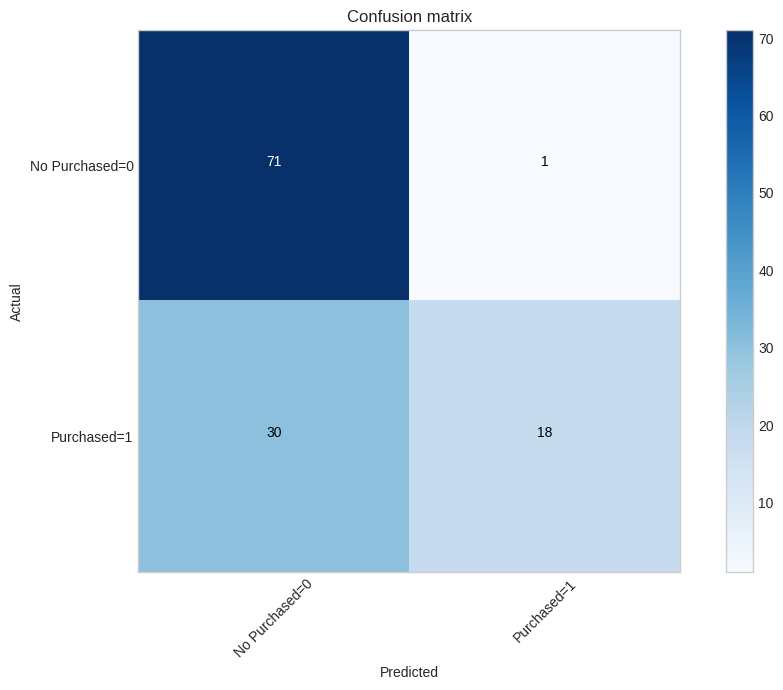

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.70      0.99      0.82        72
   Purchased=1       0.95      0.38      0.54        48

      accuracy                           0.74       120
     macro avg       0.83      0.68      0.68       120
  weighted avg       0.80      0.74      0.71       120
 



In [73]:
# model kedua dengan test_size= 0.3
clf2, acc_test2, acc_train2 = modeling(x, y, 0.3, ['No Purchased=0', 'Purchased=1'])

-------------------- Shape --------------------
x_train: (340, 3)
y_train: (340, 1)
x_test: (60, 3)
y_test: (60, 1)


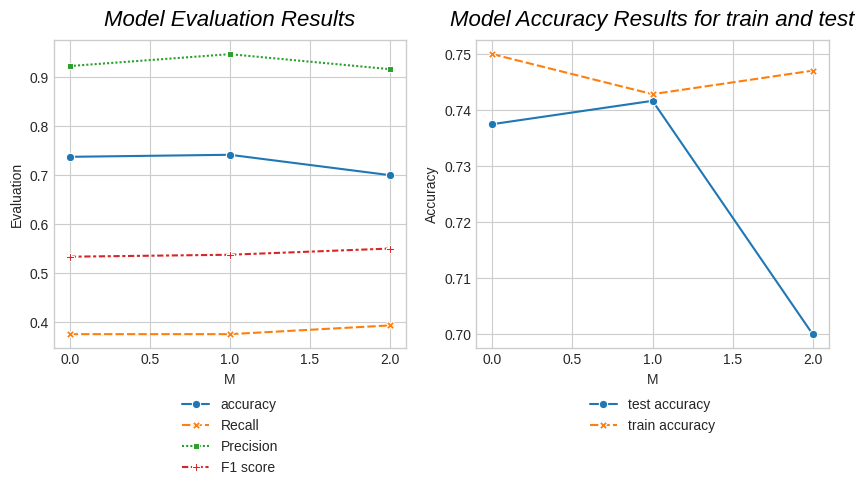

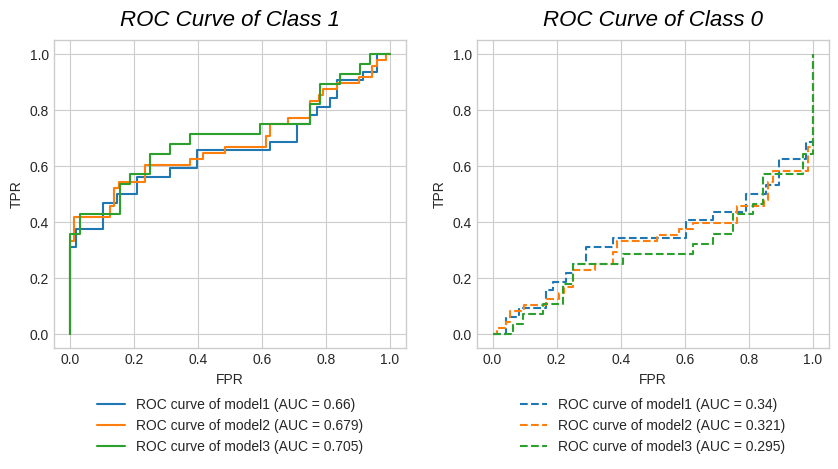

-------------------- Confusion Matrix --------------------
[[31  1]
 [17 11]]


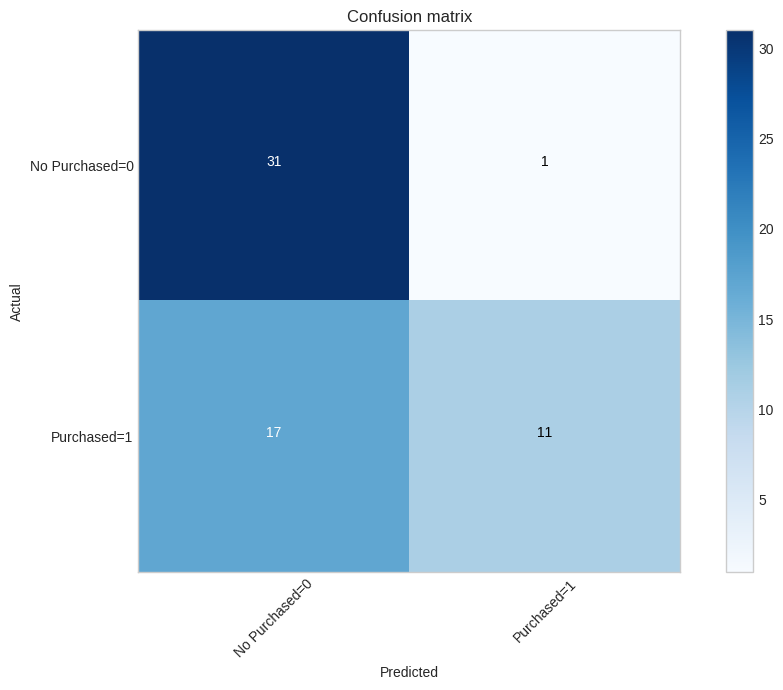

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.65      0.97      0.78        32
   Purchased=1       0.92      0.39      0.55        28

      accuracy                           0.70        60
     macro avg       0.78      0.68      0.66        60
  weighted avg       0.77      0.70      0.67        60
 



In [74]:
# Model ketiga dengan test_size= 0.15
clf3, acc_test3, acc_train3 = modeling(x, y, 0.15, ['No Purchased=0', 'Purchased=1'])

-------------------- Shape --------------------
x_train: (360, 3)
y_train: (360, 1)
x_test: (40, 3)
y_test: (40, 1)


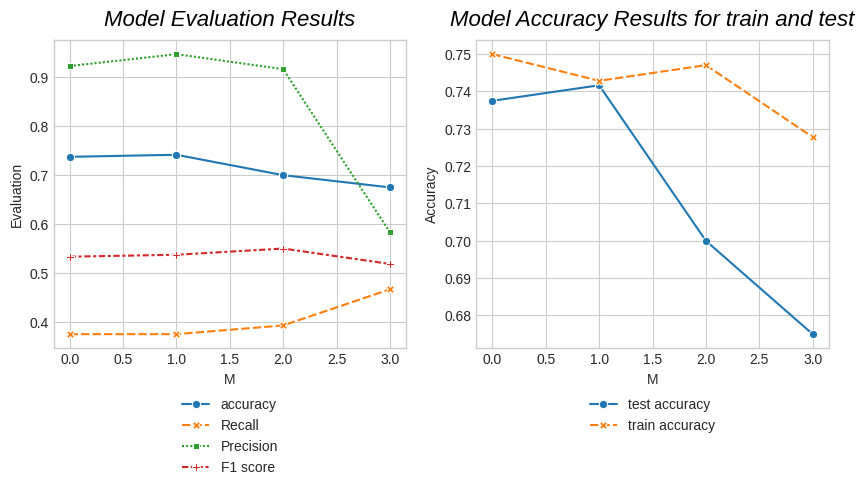

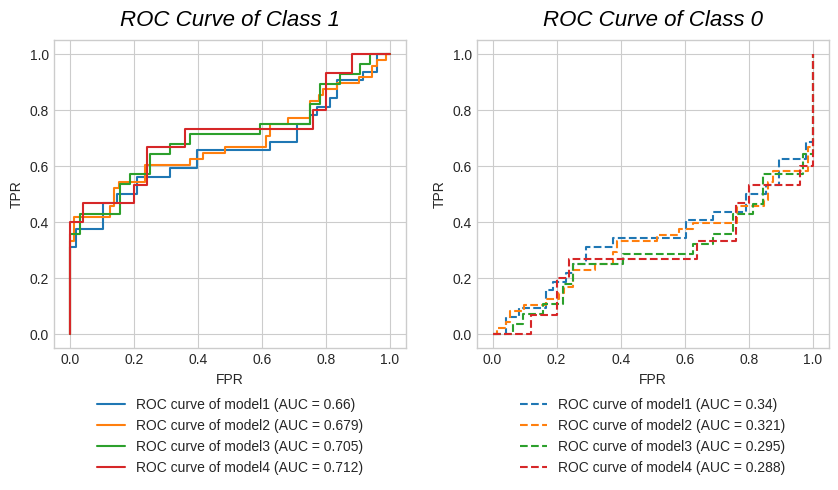

-------------------- Confusion Matrix --------------------
[[20  5]
 [ 8  7]]


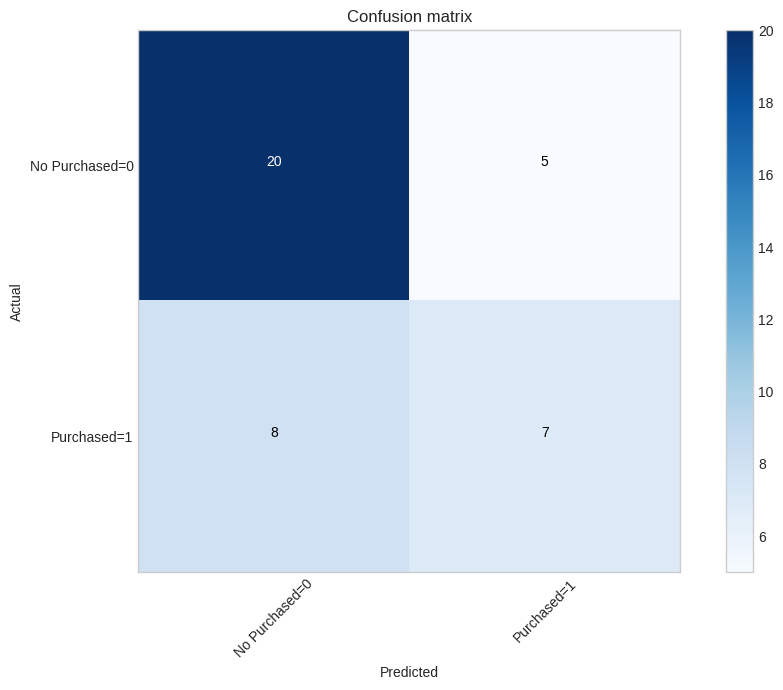

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.71      0.80      0.75        25
   Purchased=1       0.58      0.47      0.52        15

      accuracy                           0.68        40
     macro avg       0.65      0.63      0.64        40
  weighted avg       0.67      0.68      0.67        40
 



In [75]:
# Model keempat dengan test_size= 0.1
clf3, acc_test3, acc_train3 = modeling(x, y, 0.1, ['No Purchased=0', 'Purchased=1'])

Kesimpulan
dari 4 model tersebut, menghasilkan hasil evaluasi yang tidak jauh berbeda dan tidak ada peningkatan signifikan, dan juga terdapat yang turun, sehingga akan dilakukan pengecekan terkait data yang ada mungkin terdapat anomali dari data yang akan diproses

In [76]:
# Menghapus 3 model sebelumnya, dan memakai model yang pertama karena menghasilkan model yang lebih baik dari lainnya
del FPR1[1:]
del TPR1[1:]
del FPR0[1:]
del TPR0[1:]
del ACC_test[1:]
del ACC_train[1:]
del Recall[1:]
del Precision[1:]
del F1[1:]

In [77]:
# mengecek data
Perform_cross_val(clf1, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.6399999999999999
CV results: [0.925 0.825 0.8   0.7   0.85  0.4   0.5   0.55  0.6   0.25 ]



Dari 10 fold tersebut terdapat anomali di fold 6 dan fold 10 yang dimana memiliki hasil cross val paling kecil, sehingga akan dilakukan penghapus data yang ada di index fold tersebut

In [78]:
# menemukan indeks fold
find_fold_index(10, x)

fold 1: [0,39]
--------------------
fold 2: [40,79]
--------------------
fold 3: [80,119]
--------------------
fold 4: [120,159]
--------------------
fold 5: [160,199]
--------------------
fold 6: [200,239]
--------------------
fold 7: [240,279]
--------------------
fold 8: [280,319]
--------------------
fold 9: [320,359]
--------------------
fold 10: [360,399]
--------------------


In [79]:
# Menghapus indeks data yang cukup anomali
df3 = df2.drop(df2.index[np.r_[200:239+1, 360:399+1]], axis=0)
print(f'df2:{df2.shape}')
print(f'df3:{df3.shape}')

df2:(400, 4)
df3:(320, 4)


In [80]:
# Mendefinisikan x dan y baru untuk membuat model baru
x2 = np.asanyarray(df3.drop('Purchased', axis=1))
y2 = df3.Purchased.values.reshape(-1,1)

-------------------- Shape --------------------
x_train: (256, 3)
y_train: (256, 1)
x_test: (64, 3)
y_test: (64, 1)


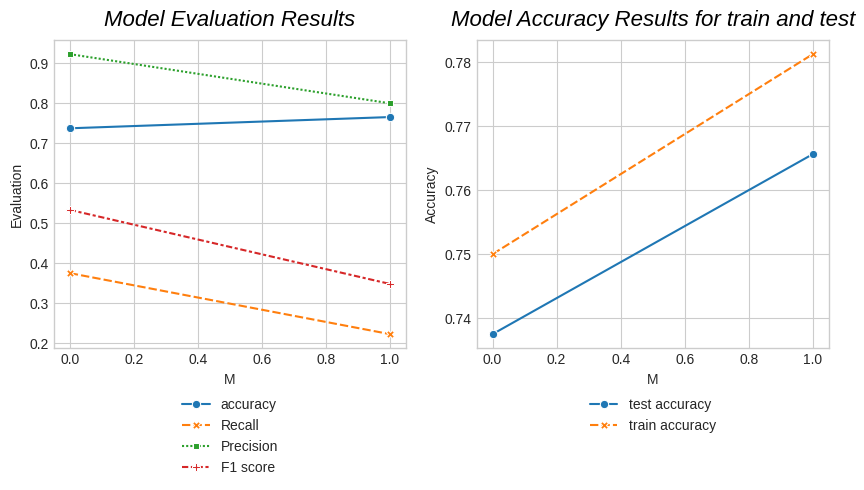

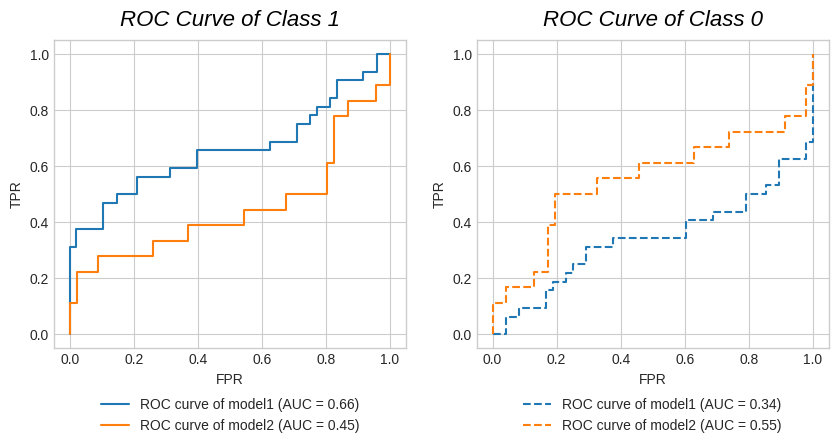

-------------------- Confusion Matrix --------------------
[[45  1]
 [14  4]]


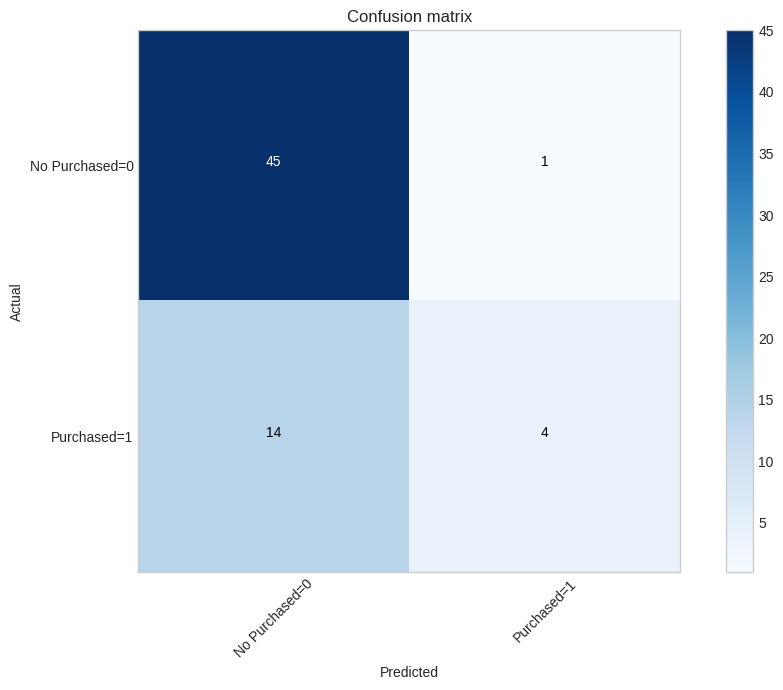

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.76      0.98      0.86        46
   Purchased=1       0.80      0.22      0.35        18

      accuracy                           0.77        64
     macro avg       0.78      0.60      0.60        64
  weighted avg       0.77      0.77      0.71        64
 



In [81]:
# model baru
clf2, acc_test2, acc_train2 = modeling(x2, y2, 0.2, classes=['No Purchased=0', 'Purchased=1'])

In [82]:
# melatih model baru
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
x_test = np.concatenate((x_test, y_test), axis=1)
x_test = pd.DataFrame(x_test, columns=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])

In [83]:
x_test

,Gender,Age,EstimatedSalary,Purchased
0,1.0,31.0,35.422222,0.0
1,0.0,45.0,37.911111,0.0
2,0.0,29.0,38.222222,0.0
3,0.0,24.0,31.377778,0.0
4,1.0,41.0,35.733333,0.0
...,...,...,...,...
59,0.0,45.0,21.422222,1.0
60,0.0,35.0,19.555556,0.0
61,0.0,25.0,23.600000,0.0
62,1.0,26.0,18.000000,0.0


In [84]:
clf2.predict(x_test.drop('Purchased', axis=1))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

## Pengujian dengan Data Baru

In [85]:
# Melatih model yang sudah fiks akan dipakai
final_model = MultinomialNB()
final_model.fit(x2, y2)

# sample data baru
new_sample = pd.DataFrame({'Gender': [1], 'Age': [50], 'EstimatedSalary': [30000]})
print(f"Gender: {new_sample['Gender'].values[0]}\n"
      f"Age: {new_sample['Age'].values[0]}\n"
      f"EstimatedSalary: {new_sample['EstimatedSalary'].values[0]}")

# melakukan scaling dengan scaler yang telah didefinisikan sebelumnya
new_sample['EstimatedSalary'] = scaler.transform(new_sample[['EstimatedSalary']])
ns = np.asanyarray(new_sample)

# prediksi data baru
result = final_model.predict(ns)
print('='*38)
print(f"class {result}")

Gender: 1
Age: 50
EstimatedSalary: 30000
class [1]
